In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_folder = "/root/stonefish_ros2_ws/plots/csv_data/"

In [4]:
ground_truth_csv = data_folder + "dvl_velocity.csv"
real_dvl_df = pd.read_csv(ground_truth_csv)
real_dvl_df.head()

,t,__msgtype__,altitude,beams.0.__msgtype__,beams.0.distance,beams.0.id,beams.0.nsd,beams.0.rssi,beams.0.valid,beams.0.velocity,...,header.stamp.__msgtype__,header.stamp.nanosec,header.stamp.sec,status,time,velocity.__msgtype__,velocity.x,velocity.y,velocity.z,velocity_valid
0,1.724164e+09,sensors/msg/DVLVelocity,1.039747,sensors/msg/DVLBeam,1.1682,0,-93.326019,-49.423458,True,0.008434,...,builtin_interfaces/msg/Time,686511278,1724164479,0,111.912727,geometry_msgs/msg/Vector3,0.070223,-0.029040,0.035963,True
1,1.724164e+09,sensors/msg/DVLVelocity,1.039747,sensors/msg/DVLBeam,1.1682,0,-93.280067,-52.570091,True,0.032267,...,builtin_interfaces/msg/Time,790517568,1724164479,0,106.190918,geometry_msgs/msg/Vector3,0.063448,-0.007738,0.051521,True
2,1.724164e+09,sensors/msg/DVLVelocity,1.034296,sensors/msg/DVLBeam,1.1564,0,-93.137146,-52.756828,True,0.061299,...,builtin_interfaces/msg/Time,891248464,1724164479,0,114.017250,geometry_msgs/msg/Vector3,0.056214,0.020683,0.072894,True
3,1.724164e+09,sensors/msg/DVLVelocity,1.023394,sensors/msg/DVLBeam,1.1446,0,-93.028000,-54.893784,True,0.089507,...,builtin_interfaces/msg/Time,998959302,1724164479,0,103.191849,geometry_msgs/msg/Vector3,0.038158,0.045530,0.092109,True
4,1.724164e+09,sensors/msg/DVLVelocity,1.007042,sensors/msg/DVLBeam,1.1092,0,-92.792885,-59.359802,True,0.113664,...,builtin_interfaces/msg/Time,97730159,1724164480,0,107.882019,geometry_msgs/msg/Vector3,0.032210,0.063492,0.113945,True


In [5]:
ground_truth_csv = data_folder + "ground_truth.csv"
gt_df = pd.read_csv(ground_truth_csv)
gt_df.head()

,t,__msgtype__,child_frame_id,header.__msgtype__,header.frame_id,header.stamp.__msgtype__,header.stamp.nanosec,header.stamp.sec,pose.__msgtype__,pose.pose.__msgtype__,...,twist.__msgtype__,twist.twist.__msgtype__,twist.twist.angular.__msgtype__,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.twist.linear.__msgtype__,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z
0,1.760947e+09,nav_msgs/msg/Odometry,vehicle/Ground_Truth,std_msgs/msg/Header,world_ned,builtin_interfaces/msg/Time,588890789,1760946522,geometry_msgs/msg/PoseWithCovariance,geometry_msgs/msg/Pose,...,geometry_msgs/msg/TwistWithCovariance,geometry_msgs/msg/Twist,geometry_msgs/msg/Vector3,-0.020656,-0.024516,-0.013628,geometry_msgs/msg/Vector3,0.164871,-0.064121,-0.044092
1,1.760947e+09,nav_msgs/msg/Odometry,vehicle/Ground_Truth,std_msgs/msg/Header,world_ned,builtin_interfaces/msg/Time,687522041,1760946522,geometry_msgs/msg/PoseWithCovariance,geometry_msgs/msg/Pose,...,geometry_msgs/msg/TwistWithCovariance,geometry_msgs/msg/Twist,geometry_msgs/msg/Vector3,-0.020656,-0.024516,-0.013628,geometry_msgs/msg/Vector3,0.171665,-0.070555,-0.037164
2,1.760947e+09,nav_msgs/msg/Odometry,vehicle/Ground_Truth,std_msgs/msg/Header,world_ned,builtin_interfaces/msg/Time,789554776,1760946522,geometry_msgs/msg/PoseWithCovariance,geometry_msgs/msg/Pose,...,geometry_msgs/msg/TwistWithCovariance,geometry_msgs/msg/Twist,geometry_msgs/msg/Vector3,-0.020656,-0.024516,-0.013628,geometry_msgs/msg/Vector3,0.171795,-0.076891,-0.026625
3,1.760947e+09,nav_msgs/msg/Odometry,vehicle/Ground_Truth,std_msgs/msg/Header,world_ned,builtin_interfaces/msg/Time,887821782,1760946522,geometry_msgs/msg/PoseWithCovariance,geometry_msgs/msg/Pose,...,geometry_msgs/msg/TwistWithCovariance,geometry_msgs/msg/Twist,geometry_msgs/msg/Vector3,-0.035234,-0.042302,-0.010177,geometry_msgs/msg/Vector3,0.166405,-0.083205,-0.013753
4,1.760947e+09,nav_msgs/msg/Odometry,vehicle/Ground_Truth,std_msgs/msg/Header,world_ned,builtin_interfaces/msg/Time,986324376,1760946522,geometry_msgs/msg/PoseWithCovariance,geometry_msgs/msg/Pose,...,geometry_msgs/msg/TwistWithCovariance,geometry_msgs/msg/Twist,geometry_msgs/msg/Vector3,-0.035234,-0.042302,-0.010177,geometry_msgs/msg/Vector3,0.160789,-0.091247,-0.002700


# Functions

In [6]:
import numpy as np

def singal_properties(t1, t2, data1, data2):
   
    # to np array
    t1 = np.asarray(t1, dtype=float)
    t2 = np.asarray(t2, dtype=float)
    x1 = np.asarray(data1, dtype=float)
    x2 = np.asarray(data2, dtype=float)

    # Get overlap in time (valid signal)
    t_start = max(t1.min(), t2.min())
    t_end   = min(t1.max(), t2.max())

    # Find timestep
    dt1 = np.median(np.diff(np.unique(t1)))
    dt2 = np.median(np.diff(np.unique(t2)))
    dt = float(min(dt1, dt2))

    # Create shared grid
    tg = np.arange(t_start, t_end, dt)
    if tg.size < 2:
        raise ValueError("Too small overlap")

    # Interpolate in shared grid
    y1 = np.interp(tg, t1, x1)
    y2 = np.interp(tg, t2, x2)

    # Set mean = 0
    y1 = y1 - np.mean(y1)
    y2 = y2 - np.mean(y2)

    # Cross corelate
    cross_corelation = np.correlate(y2, y1, mode='full')
    lags = np.arange(-len(y1)+1, len(y2))

    # Best lag
    lag_samples = lags[np.argmax(cross_corelation)]
    lag_sec = lag_samples * dt


    # Allign and compute scores on same grid
    y2_alligned = np.interp(tg, t2-lag_sec, x2)
    e = y2_alligned - y1
    rmse = float(np.sqrt(np.mean(e**2)))
    correlation = np.corrcoef(y2_alligned, y1)[0,1]


    return float(lag_sec), t_start, t_end, rmse, correlation

def cut_dataframe(df, t1, t2):
    return df[(df["t"] >= t1) & (df["t"] <= t2)]

# DVL

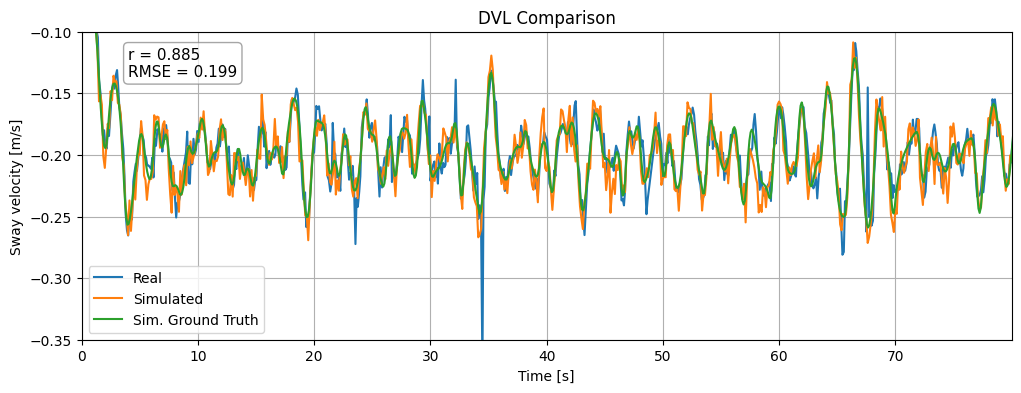

In [15]:
# Read csv
real_dvl_df = pd.read_csv(data_folder + "dvl_velocity.csv")
sim_dvl_df = pd.read_csv(data_folder + "dvl_sim.csv")
sim_gt_df = pd.read_csv(data_folder + "ground_truth.csv")

# start fra t = 0
real_dvl_df["t"] -= real_dvl_df["t"][0]
t_real = real_dvl_df["t"].values

sim_dvl_df["t"] -= sim_dvl_df["t"][0]
sim_dvl_df = cut_dataframe(sim_dvl_df, 0, 80)
t_sim = sim_dvl_df["t"].values

sim_gt_df["t"] -= sim_gt_df["t"][0]
t_gt = sim_gt_df["t"].values


# Map to correct axis
vel_y = -real_dvl_df["velocity.x"].values

vel_y_sim = sim_dvl_df["velocity.y"].values

vel_y_gt = sim_gt_df["twist.twist.linear.y"].values

time_lag, t_start, t_end, rmse, correlation = singal_properties(t_real, t_sim, vel_y, vel_y_sim)


# PLOT
plt.figure(figsize=(12, 4))
plt.title("DVL Comparison")
plt.plot(t_real, vel_y, label="Real")
plt.plot(t_sim-time_lag, vel_y_sim, label="Simulated")
plt.plot(t_gt-time_lag, vel_y_gt, label="Sim. Ground Truth", ls="-")
plt.xlabel("Time [s]")
plt.ylabel("Sway velocity [m/s]")
plt.legend()
plt.grid(True)

plt.xlim(t_start, t_end)
plt.ylim(-0.35, -0.1)

plt.text(
    0.05, 0.95,
    f"r = {correlation:.3f}\nRMSE = {rmse:.3f}",  
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.7)
)

plt.show()

# Depth

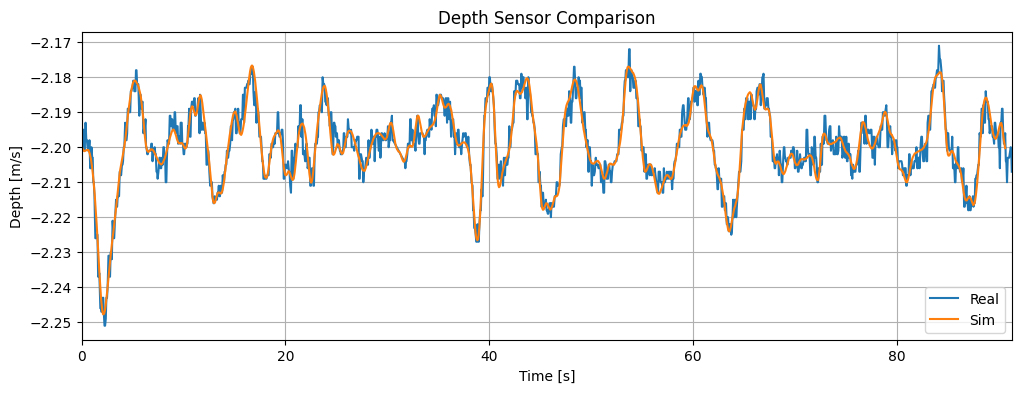

In [37]:
# Read csv
real_depth_df = pd.read_csv(data_folder + "depth.csv")
sim_depth_df = pd.read_csv(data_folder + "depth_sim.csv")

# start fra t = 0
real_depth_df["t"] -= real_depth_df["t"][0]
t_real = real_depth_df["t"].values

sim_depth_df["t"] -= sim_depth_df["t"][0]
t_sim = sim_depth_df["t"].values


RHO = 1031 # [kg/m^3]
g = 9.81

# get array of data
depth_real = real_depth_df["depth"].values
depth_real *= -1 # flip axis

depth_sim = (sim_depth_df["fluid_pressure"]) / (RHO * g)
depth_sim -= depth_sim.mean()
depth_sim += depth_real.mean()



time_lag, t_start, t_end, rmse, correlation = singal_properties(t_real, t_sim, depth_real, depth_sim)


# PLOT
plt.figure(figsize=(12, 4))
plt.title("Depth Sensor Comparison")
plt.plot(t_real, depth_real, label="Real")
plt.plot(t_sim - time_lag, depth_sim, label="Sim")

plt.xlabel("Time [s]")
plt.ylabel("Depth [m/s]")
plt.legend()
plt.grid(True)

plt.xlim(t_start, t_end)
# plt.ylim(-0.35, -0.1)


plt.show()